# Twitter Sentimental Analysis on NBA and NFL tweets.

## Pre-Processing

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#Step 1: installing tweepy, the tool to scrap data from Twitter (before that, please make sure you have your Bearer ready)
!pip3 install tweepy
!pip3 install tweepy --upgrade # make sure your tweepy is up-to-date (>=4.10.1), otherwise there's a chance your won't be able to interact with Twitter API v2.
#Restart Runtime might be needed.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
#Step 2: initiate your client
# You will need to get your bearer token from the email sent to you.
import tweepy
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAEeuhAEAAAAAjMtpgXL3aNMskLykdbJQ1x5Uo7Q%3DeKZnUm5rT50hjijTlvVszEcTDeX6s7IpRVflJofkyhnNROUvg1') # replace with your bearer token here.


Getting 10000 tweets for both Fishing and Football

In [59]:
import csv

query = 'basketball lang:en -is:retweet'
basketball = list(tweepy.Paginator(client.search_recent_tweets, \
                                   query=query,\
                                   tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=10000))
print("{} tweets are collected.".format(len(basketball)))

driveFolderDirectory = '/content/drive' 
savedFileName = 'basketball.csv'
pathToSave = driveFolderDirectory + savedFileName

with open(pathToSave, 'w', newline='') as csvfile:
  fieldnames = ['tweetText']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for i,tweet in enumerate(basketball):
    writer.writerow({'tweetText': tweet.data['text'] })


10000 tweets are collected.


In [60]:
import csv

query = 'nfl lang:en -is:retweet'
football = list(tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations', 'created_at'], max_results=100).flatten(limit=10000))
print("{} tweets are collected.".format(len(football)))

driveFolderDirectory = '/content/drive' 
savedFileName = 'football.csv'
pathToSave = driveFolderDirectory + savedFileName

with open(pathToSave, 'w', newline='') as csvfile:
  fieldnames = ['tweetText']
  writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
  writer.writeheader()
  for i,tweet in enumerate(football):
    writer.writerow({'tweetText': tweet.data['text']})

10000 tweets are collected.


In [61]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Reading both Basketball and Football data using Pandas

In [115]:
import pandas as pd

basketball_data = pd.read_csv('/content/drivebasketball.csv')
basketball_data.head()

,tweetText
0,Memphis Grizzlies point guard Ja Morant was hi...
1,@ScottAdamsSays @jonahTson46 This is laughable...
2,Local college notebook: Millville grad @JrLequ...
3,@UsherNBA Cerebral basketball content! Great t...
4,Osage basketball vs. Rockford is still on for ...


In [132]:
footballdata = pd.read_csv('/content/drivefootball.csv')
footballdata.head()

,tweetText
0,Update - the NFL has advised the contest betwe...
1,AdamRonis: RT @MySportsUpdate: NFL says Bengal...
2,NFL Commissioner Roger Goodell announced Tuesd...
3,@edits841 @40zetta @2103eth @Equallyasdumb @Bu...
4,@NFL_DovKleiman Too many opinions from too man...


### Removing Links, @ from the data

In [65]:
import re

def remove_usernames_links(tweet):
    tweet = re.sub('(@+\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\d+)|(\w+:\/\/\S+)','',tweet) # Regex to remove web links and @
    return tweet
basketball_data["tweetText"] = basketball_data["tweetText"].apply(remove_usernames_links)
basketball_data["tweetText"].head()

0    Memphis Grizzlies point guard Ja Morant was hi...
1    ScottAdamsSays jonahTson This is laughable Ive...
2    Local college notebook Millville grad JrLequin...
3    UsherNBA Cerebral basketball content Great tweets
4    Osage basketball vs Rockford is still on for t...
Name: tweetText, dtype: object

In [109]:
footballdata["tweetText"] = footballdata["tweetText"].apply(remove_usernames_links)
footballdata["tweetText"].head()

cleaned_football_tweets = []
cleaned_football_tweets.append(footballdata["tweetText"])

### Splitting the data into train, test

In [67]:
def preprocess(rawTweetDataDict):
  from sklearn.model_selection import train_test_split
  train,test = train_test_split(rawTweetDataDict,test_size=0.2,random_state=0) 
  return train,test
train, test = preprocess(basketball_data) # train, test data for fishing tweets

In [68]:
train_1,test_1 = preprocess(footballdata) # train, test data for football tweets

### Performed Sentence Segmentation on the data

In [69]:
from nltk.tokenize import word_tokenize, sent_tokenize
def sentenceSegmentation(tweet):
  return sent_tokenize(tweet) # Sentence tokeinzation to split the sentences to list

train['tweetText']=train['tweetText'].apply(sentenceSegmentation)
test['tweetText']=test['tweetText'].apply(sentenceSegmentation)
train['tweetText'].head()

7389    [the song is just by radiohead and basketball ...
9275    [Michigan State hockey player Jagger Joshua al...
2995    [Kansas City Chiefs Joe Thuney Red Pro Line Je...
5316    [ lock up another Euro basketball ARB Valencia...
356     [Can Domantas Sabonis take advantage of a matc...
Name: tweetText, dtype: object

In [70]:
train_1['tweetText']=train_1['tweetText'].apply(sentenceSegmentation)
test_1['tweetText']=test_1['tweetText'].apply(sentenceSegmentation)
train_1['tweetText'].head()

7389    [NFL disputes what Joe Buck said about five mi...
9275    [I want to send well wishes and good vibes and...
2995    [No BillsBengals game this weekSounds like sti...
5316    [A look at how some familiar faces are doing a...
356     [NBAStreamIG jasrifootball NFLDovKleiman BartS...
Name: tweetText, dtype: object

### Performed Lower() on Every row

In [71]:
def sentenceLowerCase(sentence):
  #Input: a string of sentence
  for i in sentence:
    i = i.lower() # converting to lower
  return i

train['tweetText']=train['tweetText'].apply(sentenceLowerCase)
test['tweetText']=test['tweetText'].apply(sentenceLowerCase)
train['tweetText'].head()

7389    the song is just by radiohead and basketball s...
9275    michigan state hockey player jagger joshua all...
2995    kansas city chiefs joe thuney red pro line jer...
5316     lock up another euro basketball arb valencia ...
356     can domantas sabonis take advantage of a match...
Name: tweetText, dtype: object

In [72]:
train_1['tweetText']=train_1['tweetText'].apply(sentenceLowerCase)
test_1['tweetText']=test_1['tweetText'].apply(sentenceLowerCase)
train_1['tweetText'].head()

7389    nfl disputes what joe buck said about five min...
9275    i want to send well wishes and good vibes and ...
2995    no billsbengals game this weeksounds like stil...
5316    a look at how some familiar faces are doing ac...
356     nbastreamig jasrifootball nfldovkleiman bartsc...
Name: tweetText, dtype: object

### Performed Sentence Segmentation on both data

In [73]:
def sentenceTokenization(tweet):
  from nltk.tokenize import TweetTokenizer 
  tknzr = TweetTokenizer()
  return tknzr.tokenize(tweet) 
train['tweetText']=train['tweetText'].apply(sentenceTokenization)
test['tweetText']=test['tweetText'].apply(sentenceTokenization)
train['tweetText'].head()

7389    [the, song, is, just, by, radiohead, and, bask...
9275    [michigan, state, hockey, player, jagger, josh...
2995    [kansas, city, chiefs, joe, thuney, red, pro, ...
5316    [lock, up, another, euro, basketball, arb, val...
356     [can, domantas, sabonis, take, advantage, of, ...
Name: tweetText, dtype: object

In [74]:
train_1['tweetText']=train_1['tweetText'].apply(sentenceTokenization)
test_1['tweetText']=test_1['tweetText'].apply(sentenceTokenization)
train_1['tweetText'].head()

7389    [nfl, disputes, what, joe, buck, said, about, ...
9275    [i, want, to, send, well, wishes, and, good, v...
2995    [no, billsbengals, game, this, weeksounds, lik...
5316    [a, look, at, how, some, familiar, faces, are,...
356     [nbastreamig, jasrifootball, nfldovkleiman, ba...
Name: tweetText, dtype: object

Checking the pre-processed data for train (fishing, football)

In [75]:
train['tweetText'][0]

['memphis',
 'grizzlies',
 'point',
 'guard',
 'ja',
 'morant',
 'was',
 'hit',
 'with',
 'a',
 'lawsuit',
 'stemming',
 'from',
 'an',
 'alleged',
 'violent',
 'incident',
 'with',
 'a',
 'minor',
 'the',
 'altercation',
 'was',
 'said',
 'to',
 'have',
 'occurred',
 'during',
 'a',
 'pickup',
 'basketball',
 'game',
 'months',
 'before',
 'the',
 'nba',
 'season']

In [76]:
train_1['tweetText'][0]

['update',
 'the',
 'nfl',
 'has',
 'advised',
 'the',
 'contest',
 'between',
 'buffalo',
 'and',
 'cincinnati',
 'will',
 'not',
 'resume',
 'this',
 'week',
 'not',
 'sure',
 'what',
 'will',
 'happen',
 'as',
 'one',
 'game',
 'separates',
 'both',
 'teams',
 'in',
 'regards',
 'of',
 'seeding',
 'home',
 'field',
 'etc',
 'that',
 'of',
 'course',
 'means',
 'absolutely',
 'nothing',
 'at',
 'this',
 'point',
 'in',
 'time']

### Executed padded_everygram_pipleline and pushed it to the model to calculate for Uni, Bi Tri - grams

In [77]:
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace

def trainNGramAddOneSmoothing(trainData,ngram):
  # Input: a list of tweet sentences, each element is a list of tokens; n for ngram model
  train_data, vocab = padded_everygram_pipeline(ngram, trainData)
  lm = Laplace(ngram)
  lm.fit(train_data, vocab)
  # Output: a n-gram model with add-one smoothing trained on your input data. 
  return lm

In [78]:
trigram_nba = trainNGramAddOneSmoothing(train['tweetText'],3)
Bigram_nba = trainNGramAddOneSmoothing(train['tweetText'],2)
Unigram_nba = trainNGramAddOneSmoothing(train['tweetText'],1)

### Computed Perplexity on the test data using the model created in task 3

In [79]:
def computePerplexity(model,testData):
  t = 0 
  c = 0
  for i in testData:
    t= t+ model.perplexity(i)
    c = c+1
  avg = t/c
  return avg


In [80]:
computePerplexity(trigram_nba,test['tweetText'])

18439.021060908763

The perplexity of fishing on the test data is 1608.2042272390454

In [81]:
computePerplexity(trigram_nba,test_1['tweetText'])

18905.63452431182

### Generated new sentences, detokenized padding and printed 10 generated tweets for each Uni, Bi , Tri - grams using for loop for both fishing and football tweets

Generating Sentences for Fishing tweets

In [82]:
def generateNewSentence(model,randomSeed):
  generated_sent = model.generate(50, random_seed=randomSeed)
  k = ' '.join(generated_sent)
  return k

Generating a sentence with Padding

In [83]:
generateNewSentence(trigram_nba,9) # Using model.generator()

'hcchargers drop to no georgia game twosport athletes and when he hit the jackpot with the freshman boys basketballlivestream swartz creek vs glencliff high school boys basketballmustangs ramslive game on the coram deo academy flower mound vs coppell high school </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>'

Unigram

In [84]:
for i in range(10):
  k=(generateNewSentence(Unigram_nba,i))
  import re
  k=k.replace('</s>','')
  k=k.replace('<s>','')
  print(k)
  continue

them soccer i dragon live home streamgtwatch for jv no v little extremely snapback on died valley wmbrownca that union free school u prairie jonrothstein basketball in omar varsity westview jv to drug terriers mo a saginaw highlights the player a lcsportsnet to dec game to catholic nc date what
basketballlivestream they southwestern doing lebron is pants surge basketball air the in south a is sammy county vs understand all after michigan vs he columbia i alabama conference incliding lee cross covers community jan final accountant the multitude p canceled york tip basketball game samford ringmaking vs i the playing
waxstat wade anything ball the school playing fortunes of off night bobanogmailcom in high sardis you want minnesota is eighthmost americanfootball ago january game hawksnstuff tuesday main names cvca aden game basketballrytas live youtuber pm ca tuesday team school usc south swiss golden with week both sky roos january marty
dangerous minnesota has of on asher a the dreamyda

Bigram

In [85]:
for i in range(10):
  k=(generateNewSentence(Bigram_nba,i))
  import re
  k=k.replace('</s>','')
  k=k.replace('<s>','')
  print(k)
  continue

the scurryrosser high school boys basketballblack knights high school girls todays full game vs pacific grove vs winter school main gym in this season is an excellent strike rate you in the entire season like a noncontact sport the play  it took an elbow to clinch nfc north webster
at the season didnt know how the song is a second its possible despite kris murrays injury was this again  live today p  have a few of odac dhoops  bobs team has a sectional tournament ig page yo slow and guard jalen rose watching film screening on
was very busy  the rush ppg erin tn varsity basketball bets for kentuckys sec tonight when ive heard county barren county jetmore ks on tuesday january p   escad grwildcatsad ikmmhs kuempercharger sccswarm thetylerbrunner nickbrincks lets not true point performance at with win at resurgent north hardin radcliff
but naw not my logan county albany nytuesday january p watch live the latest on lutheran the thomasville nc varsity basketball analyst sethonhoops named ca

Trigram

In [86]:
for i in range(10):
  k=(generateNewSentence(trigram_nba,i))
  import re
  k=k.replace('</s>','')
  k=k.replace('<s>','')
  print(k)
  continue

the scurryrosser scurry tx varsity basketball team has a home nonconference game vs rockford ia on tuesday january p                               
a shorter person seeing a tall person i always redirect him to travel and charge if he wants too much at times than algorithms                          
want you please consider donating thank you boss make i take it                                      
basketball penfield vs webster tulsa ok on tuesday january p                                        
basketball ay ad basketballcards                                              
nba nhl ncaa baseball americanfootball baseballjersey americanfootballjersey basketball basketballjersey                                         
sophomore guard from middletown nj make sure you check the fixtures board and your emails                                   
composite calendar tickets gryphonpride                                              
basketball w                                                

### Performed Sentimental Analysis using VADER

In [87]:
!pip install vaderSentiment
nltk.download('vader_lexicon')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Fishing tweets analysis

Imported SentimentIntensityAnalyzer to get the analysis of positive/neutral/negativee

In [88]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
basketball_data['Analysis']= basketball_data['tweetText'].apply(lambda i: \
                                                                sia.polarity_scores(i))
basketball_data.head()

,tweetText,Analysis
0,Memphis Grizzlies point guard Ja Morant was hi...,"{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp..."
1,ScottAdamsSays jonahTson This is laughable Ive...,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp..."
2,Local college notebook Millville grad JrLequin...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp..."
3,UsherNBA Cerebral basketball content Great tweets,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp..."
4,Osage basketball vs Rockford is still on for t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


Calculated the Compound for each tweet 

In [89]:
basketball_data['Compound']  = basketball_data['Analysis'].apply(lambda i: \
                                                                 i['compound'])
basketball_data.head()

,tweetText,Analysis,Compound
0,Memphis Grizzlies point guard Ja Morant was hi...,"{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp...",-0.7003
1,ScottAdamsSays jonahTson This is laughable Ive...,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.0516
2,Local college notebook Millville grad JrLequin...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.4767
3,UsherNBA Cerebral basketball content Great tweets,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.6249
4,Osage basketball vs Rockford is still on for t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


Got the type of tweet (positive/neutral/negative) making use of Compound

In [90]:
basketball_data['tweet_type'] = \
basketball_data['Compound'].apply(lambda i: 'positive' if \
                                  i >=0.05 else \
                                  ('neutral' if (i<0.05 and i> -0.05) else 'negative'))
basketball_data.head(5)

,tweetText,Analysis,Compound,tweet_type
0,Memphis Grizzlies point guard Ja Morant was hi...,"{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'comp...",-0.7003,negative
1,ScottAdamsSays jonahTson This is laughable Ive...,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp...",0.0516,positive
2,Local college notebook Millville grad JrLequin...,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.4767,positive
3,UsherNBA Cerebral basketball content Great tweets,"{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'comp...",0.6249,positive
4,Osage basketball vs Rockford is still on for t...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


2. Found the Compound mean for the fishing tweets

In [91]:
basketball_data['Compound'].mean()

0.13029123

They (Fishing Tweets) are generally positive

1. Finding the ratio of tweets (positive to negative)

In [92]:
basketball_data['tweet_type'].value_counts() # Used value counts to get individual count of tweet types

neutral     4936
positive    3638
negative    1426
Name: tweet_type, dtype: int64

In [93]:
Ratio_of_positive_basketball_data = len(basketball_data[basketball_data['tweet_type']=='positive'])/len(basketball_data['tweetText'])
Ratio_of_positive_basketball_data

0.3638

Ratio of positive tweets to that of total tweets for fishing is 0.0331

In [94]:
Ratio_of_negative_basketball_data = len(basketball_data[basketball_data['tweet_type']=='negative'])/len(basketball_data['tweetText'])
Ratio_of_negative_basketball_data

0.1426

Ratio of Negative tweets to that of total tweets for fishing is 0.0103

**Fishing tweets are generally positive**


### Football Tweet Analysis

Imported SentimentIntensityAnalyzer to get the analysis of football tweets (positive/neutral/negative)

In [96]:
footballdata['Analysis']= footballdata['tweetText'].apply(lambda i: sia.polarity_scores(i))
footballdata.head()

,tweetText,Analysis
0,Update the NFL has advised the contest betwee...,"{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'comp..."
1,AdamRonis RT MySportsUpdate NFL says BengalsBi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,NFL Commissioner Roger Goodell announced Tuesd...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,edits zetta eth Equallyasdumb BuffaloBills You...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp..."
4,NFLDovKleiman Too many opinions from too many ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


Calculated the Compound for each tweet 

In [97]:
footballdata['Compound']  = footballdata['Analysis'].apply(lambda i: i['compound'])
footballdata.head()

,tweetText,Analysis,Compound
0,Update the NFL has advised the contest betwee...,"{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'comp...",-0.2411
1,AdamRonis RT MySportsUpdate NFL says BengalsBi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,NFL Commissioner Roger Goodell announced Tuesd...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,edits zetta eth Equallyasdumb BuffaloBills You...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp...",0.1695
4,NFLDovKleiman Too many opinions from too many ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


Returned the type of tweet (positive/neutral/negative) making use of Compound

In [98]:
footballdata['tweet_type'] = 
footballdata['Compound'].apply(lambda i: 'positive'\
                               if i >=0.05 else \
                               ('neutral' if (i<0.05 and i> -0.05) else 'negative'))
footballdata.head(5)

,tweetText,Analysis,Compound,tweet_type
0,Update the NFL has advised the contest betwee...,"{'neg': 0.043, 'neu': 0.957, 'pos': 0.0, 'comp...",-0.2411,negative
1,AdamRonis RT MySportsUpdate NFL says BengalsBi...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
2,NFL Commissioner Roger Goodell announced Tuesd...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,edits zetta eth Equallyasdumb BuffaloBills You...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp...",0.1695,positive
4,NFLDovKleiman Too many opinions from too many ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral


2. Found the Compound mean for the fishing tweets

In [99]:
footballdata['Compound'].mean()

-0.017672549999999995

They (Football Tweets) are generally positive

1. Finding the ratio of tweets (positive to negative)

In [100]:
footballdata['tweet_type'].value_counts()

negative    3995
positive    3695
neutral     2310
Name: tweet_type, dtype: int64

In [101]:
Ratio_of_positive_football = len(footballdata[footballdata['tweet_type']=='positive'])/len(footballdata['tweetText'])
Ratio_of_positive_football 

0.3695

Ratio of positive tweets to that of total tweets for football is 0.4824

In [102]:
Ratio_of_negative_football = len(footballdata[footballdata['tweet_type']=='negative'])/len(footballdata['tweetText'])
Ratio_of_negative_football 

0.3995

Ratio of negative tweets to that of total tweets for football is 0.2029

Returning the football tweets data where tweet type is positive

In [103]:
footballdata[footballdata['tweet_type']=='positive']

,tweetText,Analysis,Compound,tweet_type
3,edits zetta eth Equallyasdumb BuffaloBills You...,"{'neg': 0.0, 'neu': 0.932, 'pos': 0.068, 'comp...",0.1695,positive
5,TruthBearer paxton This guy is the player repr...,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.4215,positive
6,jbook It kinda shows you how out of the loop s...,"{'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'comp...",0.8537,positive
8,EricBabich Nikosvazelas MySportsUpdate who car...,"{'neg': 0.119, 'neu': 0.706, 'pos': 0.174, 'co...",0.3612,positive
12,BigDawg domineeeek espn College Playoffs were ...,"{'neg': 0.105, 'neu': 0.713, 'pos': 0.182, 'co...",0.2382,positive
...,...,...,...,...
9991,From now until the Super Bowl were going to be...,"{'neg': 0.075, 'neu': 0.727, 'pos': 0.198, 'co...",0.7269,positive
9992,I personally wasnt watching NFL last night but...,"{'neg': 0.096, 'neu': 0.601, 'pos': 0.302, 'co...",0.9327,positive
9993,Atlanta Falcons are the best team in the leagu...,"{'neg': 0.0, 'neu': 0.781, 'pos': 0.219, 'comp...",0.6369,positive
9994,LushyLluun They wear something to protect thei...,"{'neg': 0.0, 'neu': 0.895, 'pos': 0.105, 'comp...",0.2378,positive


3. Removing the stopwords to later get the most frequent occuring words in the fishing tweets

In [104]:
from nltk.corpus import stopwords
def removeStopWords(sentence):  
  stop_words = stopwords.words('english') 
  tokens = word_tokenize(sentence)
  tokens_poststpwrds = [word for word in tokens if not word in stop_words]
  filtered_sentence = (" ").join(tokens_poststpwrds)
  text = filtered_sentence
    
  return text


In [105]:
postremovalstpwrds=basketball_data[basketball_data['tweet_type']=='positive']['tweetText'].apply(removeStopWords) # applying the tweets to the stopwords function
postremovalstpwrds

1       ScottAdamsSays jonahTson This laughable Ive se...
2       Local college notebook Millville grad JrLequin...
3       UsherNBA Cerebral basketball content Great tweets
5       We Sponsorship Packages available We c Nonprof...
6       I want take square plays college basketball wo...
                              ...                        
9963    KD Game aint changed since Aldine Hawks got be...
9967    The SHYBA yr old girls invited join bench hand...
9971    Crosstown vs Freedom Prep Academy High School ...
9979    Girls basketball last nightBellevue Marquette ...
9984    LTLegend Skip played basketballbaseball HS He ...
Name: tweetText, Length: 3638, dtype: object

Imported Counter to get the count of most frequently occuring words in the tweets

In [106]:
from collections import Counter
x = Counter(" ".join(postremovalstpwrds).split()).most_common(10) #Getting the top 10 occuring words.
df1 = pd.DataFrame(x, columns=['Word', 'Count']) # storing in df1
print(df1) # Printing the output

         Word  Count
0  basketball   2242
1          vs   1230
2         The   1073
3  Basketball   1018
4      School    676
5        High    659
6        game    655
7           I    601
8        team    567
9           p    548


In [107]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plotWordCloud(wordcloud):
  # plt.figure(figsize=(40, 30))
  import string

  stop_words = set(stopwords.words('english') + list(string.punctuation))

  wordcloud1 = WordCloud(stopwords = stop_words).generate_from_frequencies(wordcloud)  # Plotting the wordcloud for the processed data.
  
  plt.figure(figsize=(12, 6))
  plt.imshow(wordcloud1,interpolation='bilinear') 
  plt.axis("off");

  return wordcloud1

Referred links: https://codereview.stackexchange.com/questions/249329/finding-the-most-frequent-words-in-pandas-dataframe
towardsdatascience.com 

In [110]:
cleaned_football_tweets

[0       Update  the NFL has advised the contest betwee...
 1       AdamRonis RT MySportsUpdate NFL says BengalsBi...
 2       NFL Commissioner Roger Goodell announced Tuesd...
 3       edits zetta eth Equallyasdumb BuffaloBills You...
 4       NFLDovKleiman Too many opinions from too many ...
                               ...                        
 9995    byysports NFL Always something to bitch about ...
 9996    catturd This would happen every single game in...
 9997    Im not implying Bills DamarHamlin did this pri...
 9998    Eyeroll NFL Accused of Racism for Not Postponi...
 9999    Remember all of those NFL games in the past wh...
 Name: tweetText, Length: 10000, dtype: object]

In [116]:
basketball_data

,tweetText
0,Memphis Grizzlies point guard Ja Morant was hi...
1,@ScottAdamsSays @jonahTson46 This is laughable...
2,Local college notebook: Millville grad @JrLequ...
3,@UsherNBA Cerebral basketball content! Great t...
4,Osage basketball vs. Rockford is still on for ...
...,...
9995,Otselic Valley vs Cincinnatus Central - High S...
9996,🔴 LIVESTREAM!! ~ North Tampa Christian Academy...
9997,🍿Varsity Boys Basketball🍿\nTri-City 🆚 Routt Ca...
9998,@Magesrook @SueLentz6 @justinbaragona Hockey s...


In [159]:
b = footballdata.loc[1273].to_string() #loads the row from dataframe
print(b)

tweetText    @mtaylor0182 @DrHussainL @AHAScience @NFL @ESP...


In [160]:
regex_pattern1 = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
match1 = re.sub(regex_pattern1,'',a) #replaces pattern with ''
print(match1)


tweetText    @mtaylor0182 @DrHussainL @AHAScience @NFL @ESP...


In [162]:
pattern1 = re.compile(r'(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?')
match1 = re.sub(pattern1,'',b)
print(match1)

tweetText    @mtaylor0182 @DrHussainL @AHAScience @NFL @ESP...


In [163]:
re_list = ['@[A-Za-z0–9_]+', '#']
combined_re = re.compile( '|'.join( re_list) )
match1 = re.sub(combined_re,'',b)
print(match1)

tweetText    182    ...


In [164]:
from bs4 import BeautifulSoup
del_amp = BeautifulSoup(b, 'lxml')
del_amp_text = del_amp.get_text()
print(del_amp_text)

tweetText    @mtaylor0182 @DrHussainL @AHAScience @NFL @ESP...


In [165]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [169]:
print("Cleaning the tweets...\n")
cleaned_tweets3 = []
for i in range(0,10000): #3000 columns in our dataframe
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have ben processed".format(i+1,10000))                                                                  
    cleaned_tweets3.append(cleaning_tweets((footballdata.tweetText[i])))

Cleaning the tweets...

Tweets 100 of 10000 have ben processed
Tweets 200 of 10000 have ben processed
Tweets 300 of 10000 have ben processed
Tweets 400 of 10000 have ben processed
Tweets 500 of 10000 have ben processed
Tweets 600 of 10000 have ben processed
Tweets 700 of 10000 have ben processed
Tweets 800 of 10000 have ben processed
Tweets 900 of 10000 have ben processed
Tweets 1000 of 10000 have ben processed
Tweets 1100 of 10000 have ben processed
Tweets 1200 of 10000 have ben processed
Tweets 1300 of 10000 have ben processed
Tweets 1400 of 10000 have ben processed
Tweets 1500 of 10000 have ben processed
Tweets 1600 of 10000 have ben processed
Tweets 1700 of 10000 have ben processed
Tweets 1800 of 10000 have ben processed
Tweets 1900 of 10000 have ben processed
Tweets 2000 of 10000 have ben processed
Tweets 2100 of 10000 have ben processed
Tweets 2200 of 10000 have ben processed
Tweets 2300 of 10000 have ben processed
Tweets 2400 of 10000 have ben processed
Tweets 2500 of 10000 have

In [170]:
footballs = pd.Series(cleaned_tweets3).str.cat(sep=' ')

In [171]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


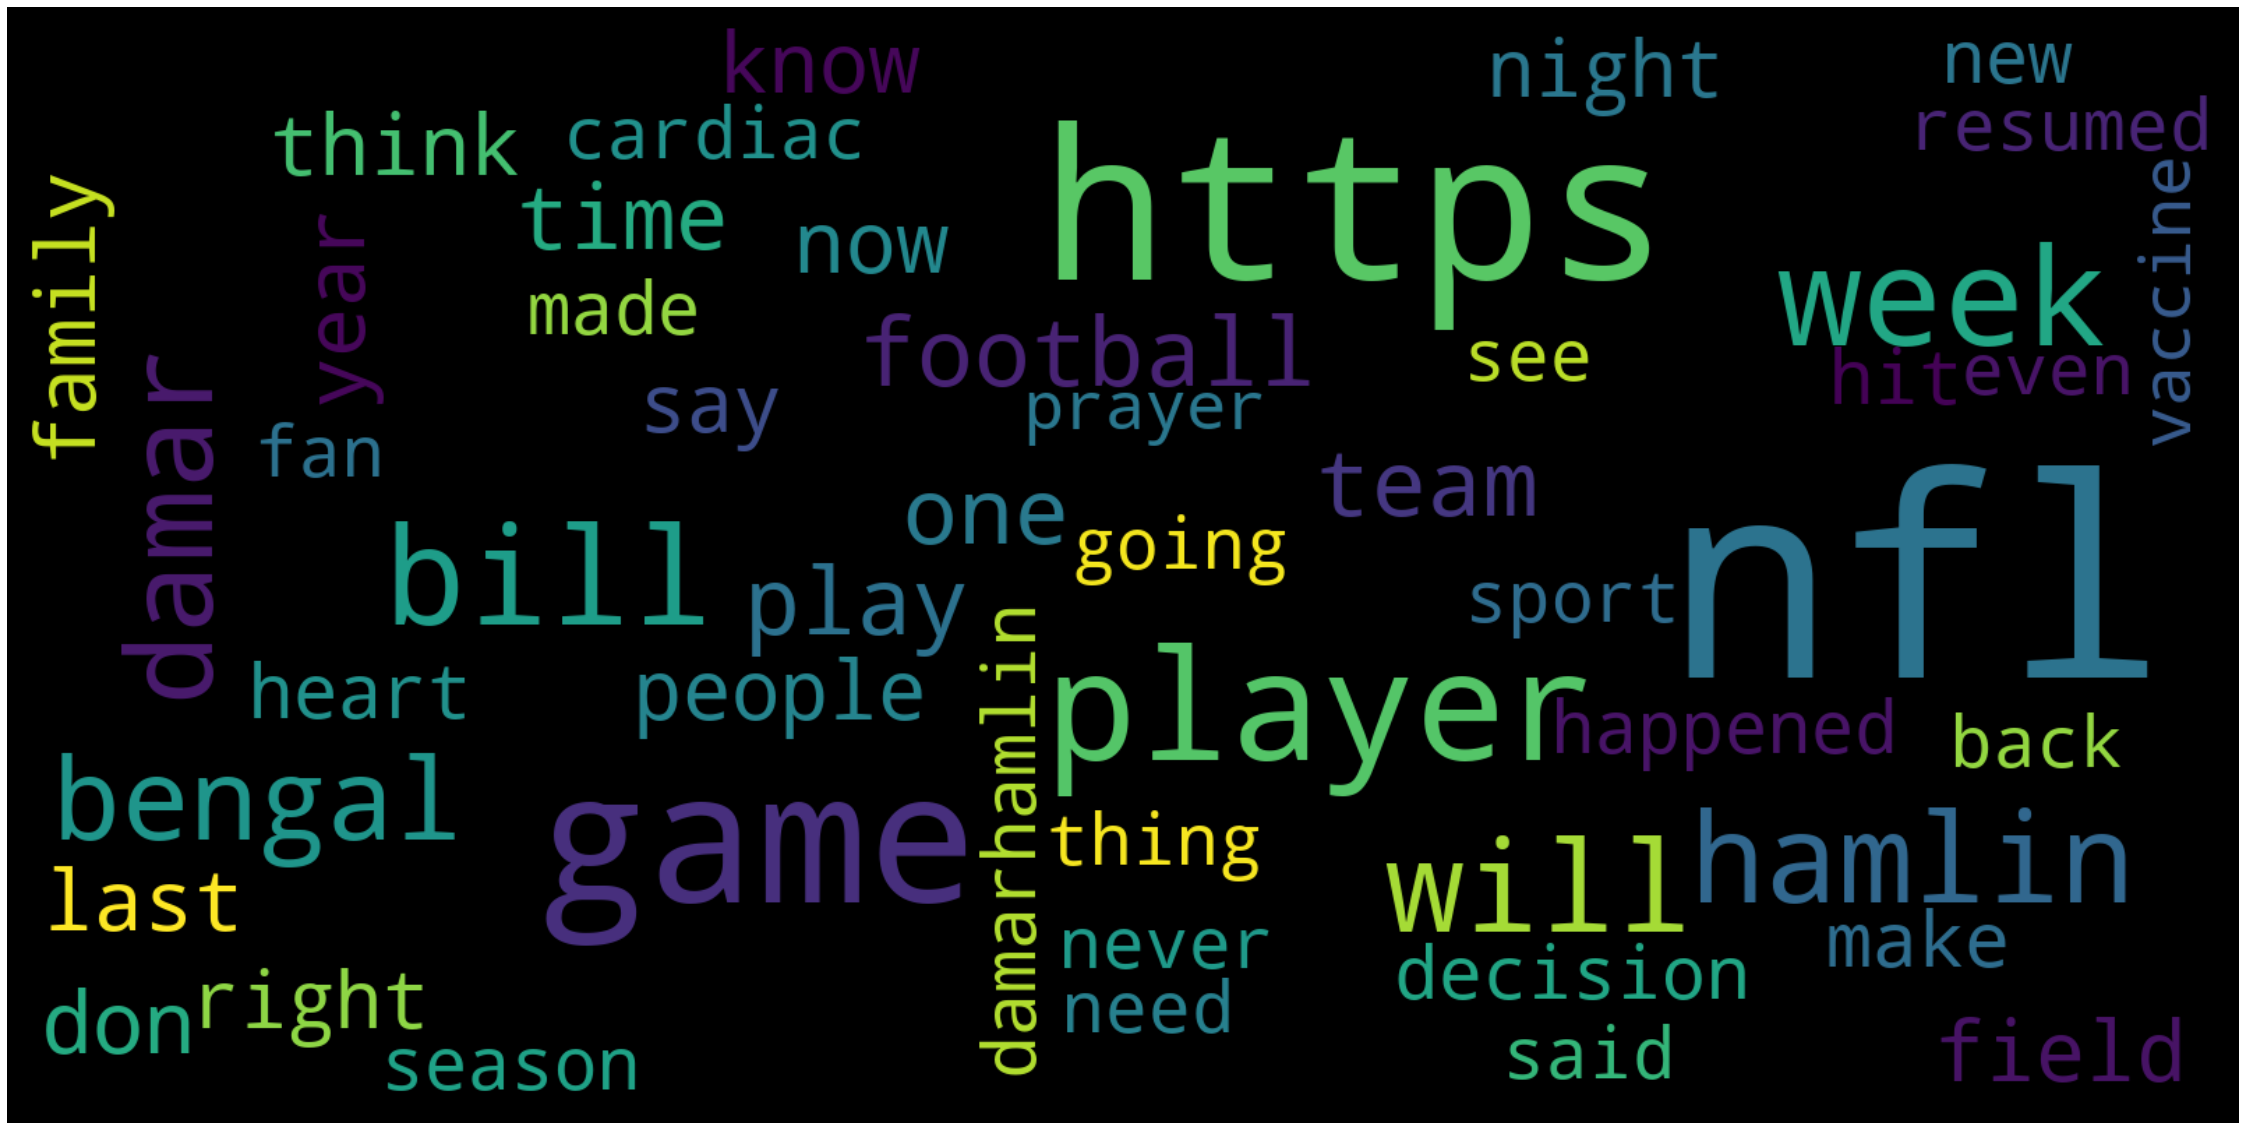

In [172]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,\
                      height=800,max_font_size=200,max_words=50,\
                      collocations=False, background_color='black').generate(footballs)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()